<h1 style="text-align:center; font-family:Baufra; "><b>Market Basket Analysis </b></h1> 

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#E8F6EF;  
            font-size:100%;
            theme: cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>About:</b>
</h3>
<p style="padding-left: 20px; padding-right: 20px; color:#4a4a4a; font-size:110%;">
In today's world every buisness wants to raise their profits. From a small pastry shop to a big MNC every one is eager to find out ways to increase their profits.
Market basket analysis is one such data mining technique used by retailers to increase sales by better understanding customer purchasing patterns. In this project we
shall try to understand the behavorial patterns of customers and try to predict sales of items. 
</p>
</div>

### 1. Importing Necessary Dependencies

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings('ignore')

### 2. Loading and Reading the dataset

In [58]:
df = pd.read_csv('Bakery.csv')
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [59]:
df.shape

(20507, 5)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [61]:
df.describe(include=object)

,Items,DateTime,Daypart,DayType
count,20507,20507,20507,20507
unique,94,9465,4,2
top,Coffee,2017-02-17 14:18:20,Afternoon,Weekday
freq,5471,11,11569,12807


In [62]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [63]:
df.Daypart.unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [64]:
df.DayType.unique()

array(['Weekend', 'Weekday'], dtype=object)

In [65]:
df['DateTime'].min()

'2016-01-11 07:51:20'

In [66]:
df['DateTime'].max()

'2017-12-03 16:28:00'

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#E8F6EF;  
            font-size:100%;
            theme: cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>Overview</b>
</h3>
<p style="padding-left: 20px; padding-right: 20px; color:#4a4a4a; font-size:110%;">
The dataset belongs to "The Bread Basket" a bakery located in Edinburgh. This dataset gives an idea of the transaction details of customers who ordered different items from this bakery online during the time period from 26-01-11 to 27-12-03. The dataset has <b>20507</b>  entries, over <b>9000</b> transactions, and 4 columns.
   
</p>
<ul style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
    <li>Number of variables: 1</li>
    <li>Numeric variables: 1</li>
    <li>Categorical variables: 4</li>
    <li>Number of observations: 20507</li>
    <li>Total number of transactions: 9465</li>
    <li>Missing cells : 0</li>
</ul>
</div>

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#E8F6EF;  
            font-size:100%;
            theme:cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>Variables</b>
</h3>
<ul style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
    <li><code>TransactionNo</code> : <b>9465</b> distinct values</li>
    <li><code><b>Items</b></code> has a high cardinality: <b>94</b> distinct values</li>
    <li><code><b>DateTime</b></code> has a high cardinality: <b>9182</b> distinct values</li>
    <li><code><b>Daypart</b></code> has <b>4</b> distinct values</li>
    <li><code><b>DayType</b></code> has <b>2</b> distinct values</li>
</ul>
</div>

<h2 style="text-align:left; font-family:Arial;"><b>3. Data Exploration and Visualization</b></h2> 

<h3 style="text-align:left; font-family:Arial;"><b>3.1 Let's look into the frequent items and the best sellers</b></h3> 

In [67]:
df['Items'].value_counts().head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Items, dtype: int64

<AxesSubplot:title={'center':'Top 10 sold items'}, xlabel='Items', ylabel='Sales in figures'>

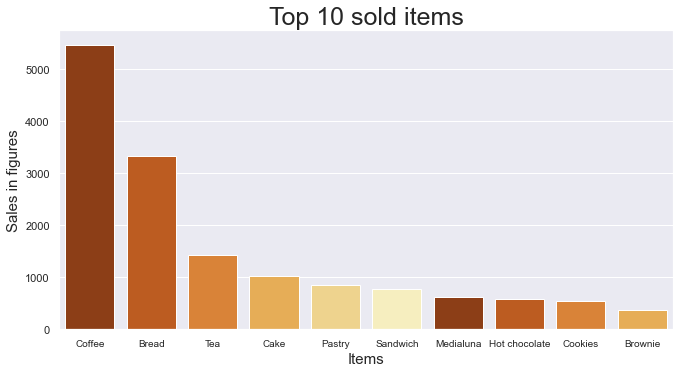

In [68]:
x1=list(df['Items'].value_counts().head(10).keys())
y1=list(df['Items'].value_counts().head(10))
plt.figure(figsize=(11,5.5))
palette=sns.color_palette("YlOrBr")
palette.reverse()
plt.title("Top 10 sold items",fontsize=25)
plt.xticks(fontsize=10)
plt.xlabel('Items',fontsize=15)
plt.ylabel('Sales in figures',fontsize=15)
sns.barplot(x=x1,y=y1,palette=palette)


<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#FFFFE0;  
            font-size:100%;
            theme:cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>The Top Selling Items are:</b>
</h3>
<ol style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
<li>Coffee</li>
<li>Bread</li>
<li>Tea</li>
<li>Cake</li>
<li>Pastry</li>  
</ol>
</div>

<h3 style="text-align:left; font-family:Arial;"><b>3.2 Let's try to get the daywise sales report</b></h3> 

In [69]:
df_day=df.copy()
df_day['Count']=1
df_day['Day']=pd.to_datetime(df_day['DateTime']).dt.day_name()
df_day.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Count,Day
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,1,Sunday
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,1,Sunday
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,1,Sunday
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,1,Sunday
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,1,Sunday


In [70]:
df_day.groupby(['Day']).count()['Count']

Day
Friday       3266
Monday       3035
Saturday     3554
Sunday       3118
Thursday     2601
Tuesday      2645
Wednesday    2288
Name: Count, dtype: int64

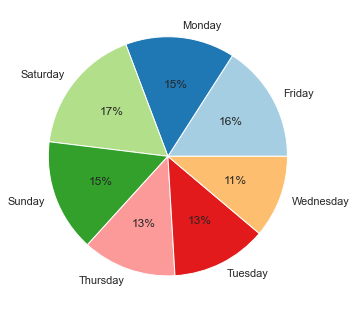

In [82]:
label =list(df_day.groupby(['Day']).count()['Count'].keys())
data = list(df_day.groupby(['Day']).count()['Count'])
plt.figure(figsize=(9.5,5.5))
colors = sns.color_palette("Paired")[0:7]
plt.pie(data, labels = label, colors = colors, autopct='%.0f%%');

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#FFFFE0;  
            font-size:100%;
            theme:cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>From the pie chart we observe the following:</b>
</h3>
<ol style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
<li>Weekends have a higher sale. </li>
    <li>Between <b>Friday</b> and <b>Monday</b> the sales are very high .</li>
<li>Wednesday has the lowest sales.</li>
</ol>
</div>
    

<h3 style="text-align:left; font-family:Arial;"><b>3.3 Let's try to understand the sales pattern throughout the day. Does time affect sales? </b></h3> 

In [72]:
df.groupby('Daypart')['Items'].count()

Daypart
Afternoon    11569
Evening        520
Morning       8404
Night           14
Name: Items, dtype: int64

In [73]:
df_hr = df.copy()

In [74]:
df_hr['Hour'] = pd.to_datetime(df_hr['DateTime']).dt.hour
df_hr['Count']=1
df_hr.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Hour,Count
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,9,1
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,10,1
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,10,1
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,10,1
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,10,1


In [75]:
df_hr.groupby(['Hour']).count()['Count']

Hour
1        1
7       24
8      645
9     1966
10    2666
11    3102
12    2854
13    2617
14    2640
15    2115
16    1343
17     368
18      82
19      48
20      22
21       3
22       8
23       3
Name: Count, dtype: int64

(7.0, 24.0)

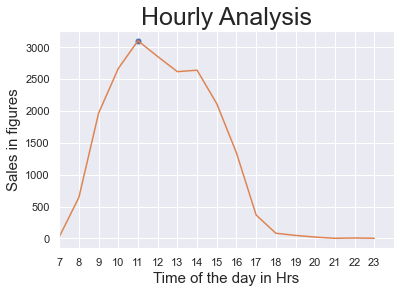

In [76]:
keys = [pair for pair, df in df_hr.groupby(['Hour'])]
plt.xticks(keys)
plt.plot(11, 3102, marker="o", markersize=5)
plt.title("Hourly Analysis",fontsize=25)
plt.xlabel('Time of the day in Hrs',fontsize=15)
plt.ylabel('Sales in figures',fontsize=15)

sns.lineplot(x=keys,y=df_hr.groupby(['Hour']).count()['Count'])
sns.set(rc={'figure.figsize':(10,8)})

plt.xlim(7,24)

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#FFFFE0;  
            font-size:100%;
            theme:cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>The hourly analysis tells us that:</b>
</h3>
<ol style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
    <li>Sales is at the peak in <b>Afternoon</b></li>
    <li>The highest sales happens from <b>10 AM</b>  till <b>3 PM</b>.</li>
<li>Throughout the morning the sales keeps <b>increasing</b>. </li>
<li>The sales decreases after <b>3 PM</b> .</li>
</ol>
</div>
    

<h3 style="text-align:left; font-family:Arial;"><b>3.4 Now let's try to find out about the monthly sales and are the sales affected by seasons?</b></h3> 

In [77]:
df_month = df.copy()
df_month['Month'] = pd.to_datetime(df_month['DateTime']).dt.month
df_month['Count']=1
df_month.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Month,Count
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,10,1
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,10,1
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,10,1
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,10,1
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,10,1


In [78]:
df_monthly=df_month.groupby(['Month']).count()['Count'].to_frame()
df_monthly

,Count
Month,
1,3027
2,2748
3,3220
4,1048
5,924
6,739
7,741
8,700
9,596


Text(0, 0.5, 'Sales in number')

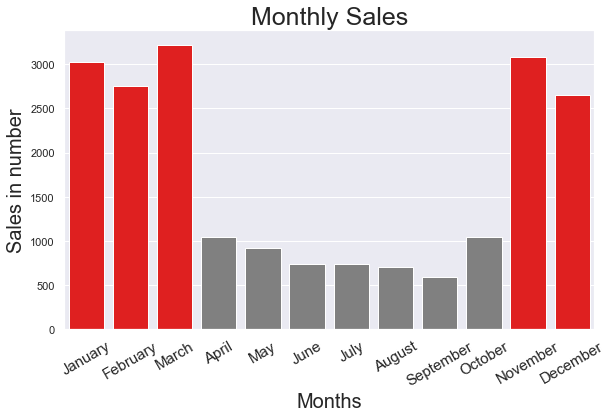

In [79]:
clrs = ['grey' if (x < 2500) else 'red' for x in df_monthly.Count ]
month=['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(9.5,5.5))
plt.title("Monthly Sales",fontsize=25)
g= sns.barplot(x=df_monthly.index,y=df_monthly.Count,data=df_monthly,palette=clrs)
g.set_xticklabels(month,rotation=30,fontsize = 15)
g.set_xlabel("Months", fontsize = 20)
g.set_ylabel("Sales in number", fontsize = 20)

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#FFFFE0;  
            font-size:100%;
            theme:cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>From the above bar chart we observe that:</b>
</h3>
<ul style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
    <li>The period from <b>November</b> to <b>March</b> has the <u>highest sales</u>.</li>
<li>The period from April to October has lowest sales.</li>
<li>We can infer that people prefer baked items in the Winters.</li>
</ul>
</div>
    

#### 
<h3 style="text-align:left; font-family:Arial;"><b>3.5 Now we try to find out is there a buying pattern in customers, do they buy some items together? So we can recommend something to them </b></h3> 

In [80]:
df_sale = df[df['TransactionNo'].duplicated(keep=False)]
df_sale['Grouped'] = df_sale.groupby('TransactionNo')['Items'].transform(lambda x: ','.join(x))
df_sale1 = df_sale[['TransactionNo', 'Grouped']].drop_duplicates()
df_sale1.head()

,TransactionNo,Grouped
1,2,"Scandinavian,Scandinavian"
3,3,"Hot chocolate,Jam,Cookies"
7,5,"Coffee,Pastry,Bread"
10,6,"Medialuna,Pastry,Muffin"
13,7,"Medialuna,Pastry,Coffee,Tea"


In [86]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_sale1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key, value)


('Coffee', 'Coffee') 1017
('Coffee', 'Bread') 678
('Coffee', 'Cake') 545
('Coffee', 'Pastry') 450
('Bread', 'Coffee') 403
('Coffee', 'Sandwich') 370
('Coffee', 'Tea') 331
('Coffee', 'Medialuna') 322
('Coffee', 'Cookies') 302
('Bread', 'Bread') 239


In [87]:
count = Counter()

for row in df_sale1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))

for key,value in count.most_common(10):
    print(key, value)

('Coffee', 'Coffee', 'Cake') 152
('Coffee', 'Coffee', 'Bread') 115
('Coffee', 'Coffee', 'Pastry') 111
('Coffee', 'Coffee', 'Sandwich') 104
('Coffee', 'Coffee', 'Cookies') 101
('Coffee', 'Coffee', 'Medialuna') 81
('Coffee', 'Coffee', 'Coffee') 77
('Coffee', 'Coffee', 'Toast') 66
('Coffee', 'Tea', 'Cake') 64
('Coffee', 'Sandwich', 'Sandwich') 61


In [88]:
count = Counter()

for row in df_sale1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,4)))

for key,value in count.most_common(10):
    print(key, value)

('Coffee', 'Coffee', 'Medialuna', 'Cookies') 24
('Coffee', 'Coffee', 'Sandwich', 'Sandwich') 23
('Coffee', 'Coffee', 'Coffee', 'Cookies') 19
('Coffee', 'Coffee', 'Coffee', 'Cake') 16
('Coffee', 'Coffee', 'Cake', 'Bread') 16
('Soup', 'Soup', 'Cake', 'Tea') 16
('Coffee', 'Coffee', 'Coffee', 'Sandwich') 15
('Coffee', 'Coffee', 'Tea', 'Cake') 15
('Coffee', 'Coffee', 'Cake', 'Sandwich') 15
('Coffee', 'Coffee', 'Bread', 'Alfajores') 14


<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#FFFFE0;  
            font-size:100%;
            theme:cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>The above analysis shows us that:</b>
</h3>
<ul style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
    <li>People order 2 coffees together</li>
    <li><b>Cake,Bread</b> and <b>pastry</b> are some options people might like with coffee.</li>
</ul>
</div>
    

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#F9ECEC;  
            font-size:100%;
            theme:cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>Business Strategy</b>
</h3>
<p style="padding-left: 20px; color:#4a4a4a; font-size:110%;">
There are a couple of strategies that the bakery can adopt if is yet to use, to increase its sales considering the observations we made earlier.
</p>
<ul style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
    <li>Promotional discounts during <b>Summer months</b> can entice customers to come to the bakery.</li>
    <li>Arranging placements of items such as <b>bread, cake</b> and <b>pastry</b> close to coffee ordering counter can be a good strategy to tempt customers into buying them.</li>
<li> <b>Buy 1 coffee get 1 coffee free</b> offer can be implemented on Wednesdays to lure the coffee lovers on Wednesday so to increase sales. </li>
</ul>
</div>

<b>Author :</b> Gulshan Acharjee

<b>Dataset Source:</b> Kaggle